## Importing libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## Loading dataset

In [3]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [4]:
boston_features = {
    'Average Number of Rooms':5,
}

X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

(404,)


## Visualizations

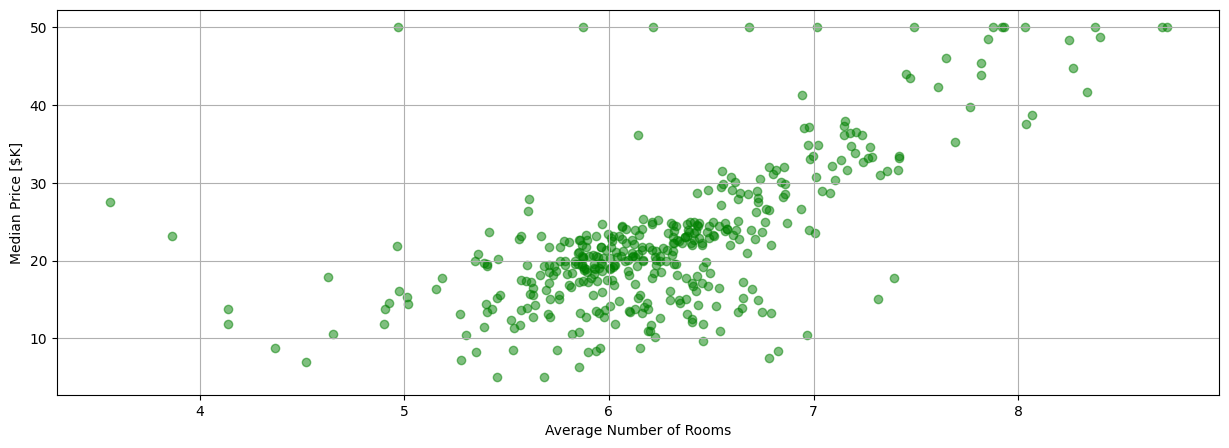

In [5]:
plt.figure(figsize=(15, 5))

plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);

## Model Building

In [6]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005), loss='mse')

## Model Fitting

In [8]:
history = model.fit(X_train_1d,
                    y_train,
                    batch_size=16,
                    epochs=101,
                    validation_split=0.3)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 602.7638 - val_loss: 725.5999
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 565.4115 - val_loss: 692.1849
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 536.3833 - val_loss: 660.6517
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 508.7911 - val_loss: 630.1115
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 482.1107 - val_loss: 600.4403
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 456.2677 - val_loss: 571.6195
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 431.2505 - val_loss: 543.6459
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 407.0567 - val_loss: 516.5185
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 383.6852 - val_loss: 490.2366
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 361.1352 - val_loss: 464.7997
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 339.4057 - val_loss: 440.2072
Epoch 12/101
18/

## Validation

In [9]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

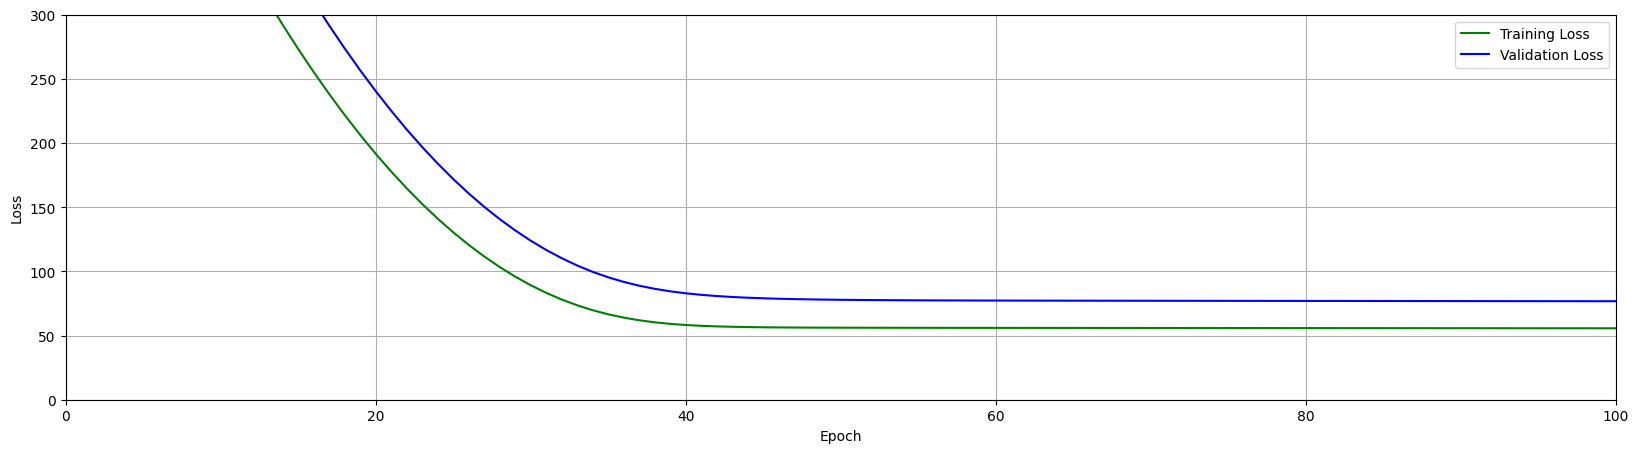

In [10]:
plot_loss(history)

## Prediction

In [12]:
x = np.array([[3], [4], [5], [6], [7]])  # shape: (5, 1)
y_pred = model.predict(x)

for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx][0], int(y_pred[idx]*10)/10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted price of a home with 3 rooms: $12.1K
Predicted price of a home with 4 rooms: $15.2K
Predicted price of a home with 5 rooms: $18.3K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.5K


<ipython-input-12-d7e1192512ac>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price of a home with {} rooms: ${}K".format(x[idx][0], int(y_pred[idx]*10)/10))


In [13]:
# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


## Conclusion

In [14]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

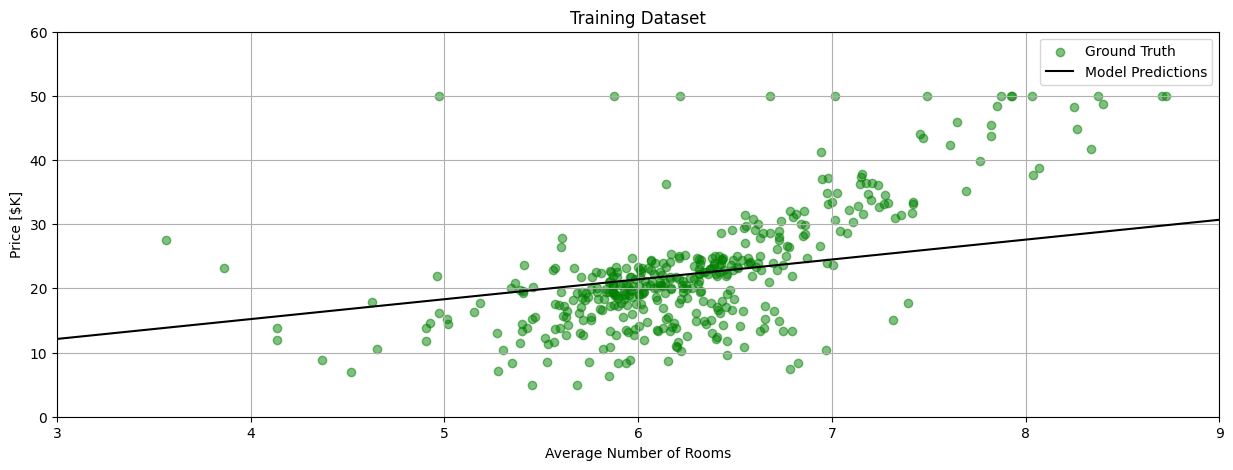

In [15]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

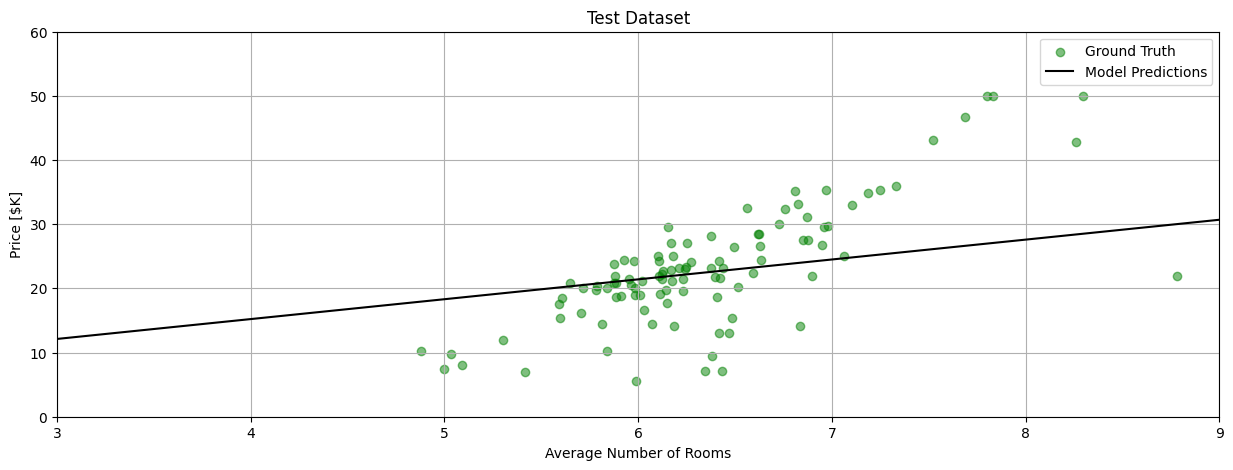

In [16]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')